# Boston

The Boston housing prices data set is often used in example tutorials.  Let's play around with that.

## Metadata

Source: http://scikit-learn.org/stable/datasets/index.html#boston-dataset

* 506 rows with no missing attributes
* 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attributes:

```
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000’s
```

## Loading the Data

In [135]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline

In [136]:
# the data loads as a sklearn.utils.Bunch
# let's convert that to a pandas DataFrame
raw = load_boston()
df = pd.DataFrame(raw.data, columns=raw.feature_names)
df['MEDV'] = raw.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Playing Around

In [137]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [138]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

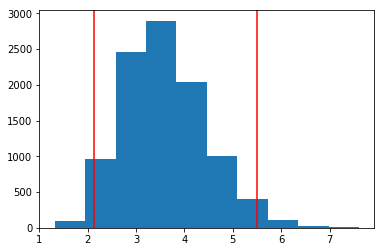

In [139]:
# let's try the central limit theorem
means = []
for _ in range(10000):
    means.append(np.random.choice(df.CRIM, size=100).mean())
    
plt.hist(means)
plt.axvline(x=np.percentile(means, 2.5), color='red')
plt.axvline(x=np.percentile(means, 97.5), color='red');

In [140]:
print("95% confidence interval:", np.percentile(means, 2.5), "and", np.percentile(means, 97.5))

95% confidence interval: 2.1362556 and 5.5024884425


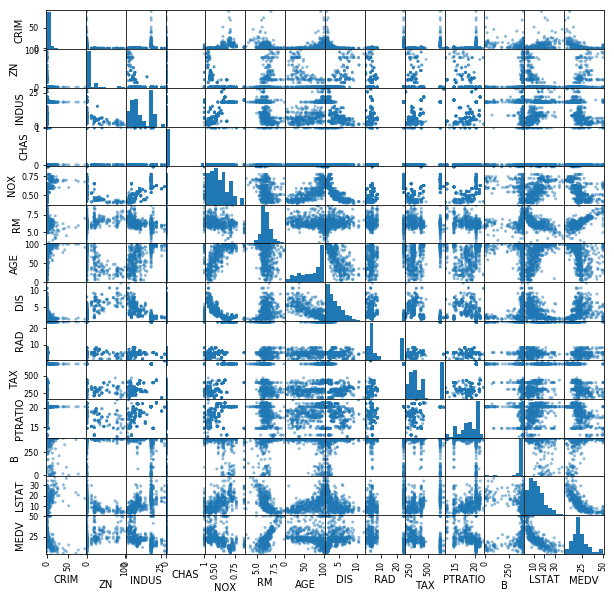

In [141]:
pd.plotting.scatter_matrix(df, figsize=[10,10]);

## Rooms vs. Median Value

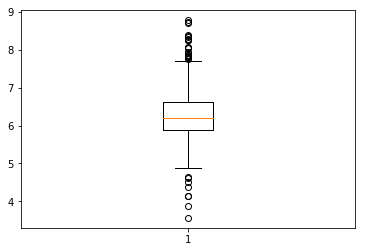

In [142]:
plt.boxplot(df.RM);

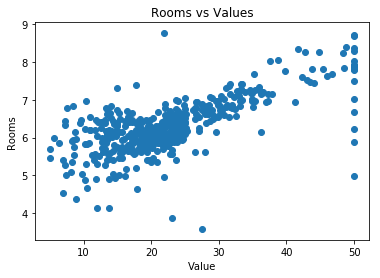

In [143]:
# for MEDV, there appear to be linear relationships with RM and LSTAT respectively.
# let's play with those and look at rooms first.
plt.scatter(y=df.RM, x=df.MEDV)
plt.ylabel('Rooms')
plt.xlabel('Value')
plt.title('Rooms vs Values');

In [144]:
# first, split data into x and Y.
# Y = what we want to predict. X = vars we use to predict.
# x must be a 2D array even with one predictor.
Y = df['MEDV']
x = df[['RM']]

# then, split our data into training and test sets:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

# instantiate the model then fit it.
model = LinearRegression()
model.fit(x_train, y_train)

# check the score (r-squared)
model.score(x_test, y_test)

0.42394386816456286

In [145]:
model.coef_

array([ 9.37638431])

In [146]:
model.intercept_

-36.476189627647315

In [147]:
for number_of_rooms in range(10):
    print(number_of_rooms, ":", model.predict(number_of_rooms))

0 : [-36.47618963]
1 : [-27.09980531]
2 : [-17.723421]
3 : [-8.34703669]
4 : [ 1.02934763]
5 : [ 10.40573194]
6 : [ 19.78211625]
7 : [ 29.15850057]
8 : [ 38.53488488]
9 : [ 47.91126919]


## Proportion of Lower Status vs. Mediam Value

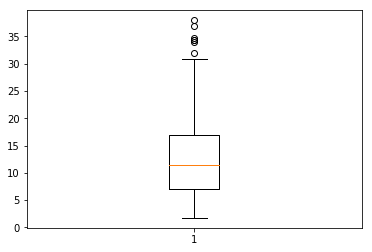

In [148]:
plt.boxplot(df.LSTAT);

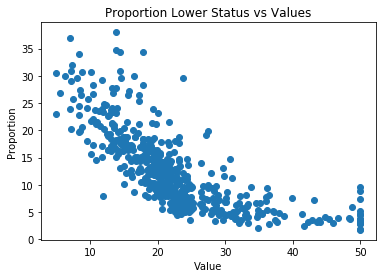

In [149]:
plt.scatter(y=df.LSTAT, x=df.MEDV)
plt.ylabel('Proportion')
plt.xlabel('Value')
plt.title('Proportion Lower Status vs Values');

In [150]:
# first, split data into x and Y.
# Y = what we want to predict. X = vars we use to predict.
# x must be a 2D array even with one predictor.
Y = df['MEDV']
x = df[['LSTAT']]

# then, split our data into training and test sets:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

# instantiate the model then fit it.
model = LinearRegression()
model.fit(x_train, y_train)

# check the score
model.score(x_test, y_test)

0.43095672846187605

In [151]:
for proportion in range(5,16):
    print(proportion, ":", model.predict(proportion))

5 : [ 29.98275466]
6 : [ 29.02626705]
7 : [ 28.06977944]
8 : [ 27.11329183]
9 : [ 26.15680421]
10 : [ 25.2003166]
11 : [ 24.24382899]
12 : [ 23.28734138]
13 : [ 22.33085376]
14 : [ 21.37436615]
15 : [ 20.41787854]


In [154]:
# first, split data into x and Y.
# Y = what we want to predict. X = vars we use to predict.
# x must be a 2D array even with one predictor.
Y = df['MEDV']
x = df.drop(['MEDV'], axis=1)

# then, split our data into training and test sets:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

# instantiate the model then fit it.
model = LinearRegression()
model.fit(x_train, y_train)

# check the score
model.score(x_test, y_test)

0.58920115191864575

In [156]:
df.drop(['MEDV'], axis=1).columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [160]:
model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([ 25.26183835])

In [161]:
model.coef_

array([ -1.18410318e-01,   4.47550643e-02,   5.85674689e-03,
         2.34230117e+00,  -1.61634024e+01,   3.70135143e+00,
        -3.04553661e-03,  -1.38664542e+00,   2.43784171e-01,
        -1.09856157e-02,  -1.04699133e+00,   8.22014729e-03,
        -4.93642452e-01])

In [162]:
model.intercept_

38.138692713392217